<a href="https://colab.research.google.com/github/gabrielatrindade/quarentenadados-alura/blob/master/Aula05_Predicoes_Machile_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5

In [0]:
dados_das_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


treino: <br>
11  2 <br>
22  4 <br>
34  7 <br>
21  3 <br>

teste: <br>
54 ?? 9 <br>

aprendizado supervisionado

tenho = x <br>
adivinhar = y <br>

f(x) = y

In [0]:
x = dados_das_notas[['ciencias_naturais', 'ciencias_humanas', 
                     'matematica', 'redacao']]
x.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [0]:
y_adivinhar = dados_das_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Separar o treino do teste

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
np.random.seed(43267)

(x_treino, x_teste, y_treino, y_teste) = train_test_split(x, y_adivinhar)

In [0]:
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [0]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
30213,524.70,509.30,496.90,620.00
83439,501.40,609.00,532.00,460.00
56490,544.40,649.60,592.80,560.00
135214,415.70,541.20,461.60,560.00
55431,405.50,592.00,571.60,520.00


## Modelo LinearSVR

In [0]:
from sklearn.svm import LinearSVR

In [0]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
modelo.predict(x_teste).shape

(24318,)

In [0]:
predicoes_notas_linguagem_codigo = modelo.predict(x_teste)
predicoes_notas_linguagem_codigo[:5]

array([486.66331109, 540.37793322, 478.79488436, 452.0140805 ,
       533.06419739])

In [0]:
y_teste[:5]

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

Não estamos vendo uma linha aqui, mas temos que lembrar que o x, o input, são 4 dimensões. Essa representação é 2D.

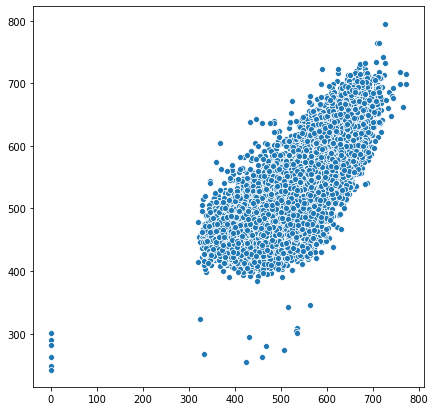

In [0]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_teste.values, 
                y=predicoes_notas_linguagem_codigo)

Vendo a nota real pela diferença entre a nota real e as prediçoes.

Conclui-se que quem tirou notas mais altas, recebeu a predição da nota mais baixa. O erro seria negativo para essas pessoas.

E quem tirou notas mais baixas, recebeu a predição da nota mais alta. Ou seja, o erro seria para mais e ajudaríamos a vida dessas pessoas.

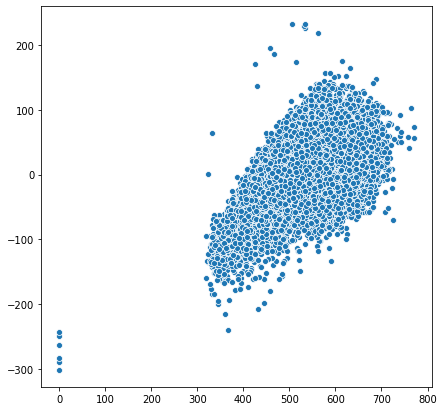

In [0]:
plt.figure(figsize=(7,7))

sns.scatterplot(x=y_teste.values, 
                y=y_teste.values - predicoes_notas_linguagem_codigo)

In [0]:
x_teste.mean(axis=1)

41528    474.48
81918    561.45
22786    442.50
17935    487.88
70617    517.42
          ...  
54239    510.27
98861    704.45
105209   462.88
110757   585.02
80515    457.20
Length: 24318, dtype: float64

In [0]:
y_teste - x_teste.mean(axis=1)

41528    -54.28
81918    -15.85
22786     75.60
17935     51.33
70617     19.48
          ...  
54239      8.93
98861    -91.85
105209    48.23
110757   -45.02
80515     58.20
Length: 24318, dtype: float64

Se eu não usasse machine learning e apenas tirasse a média das outras 4 notas pra dizer qual seria a nota de linguagens e códigos.

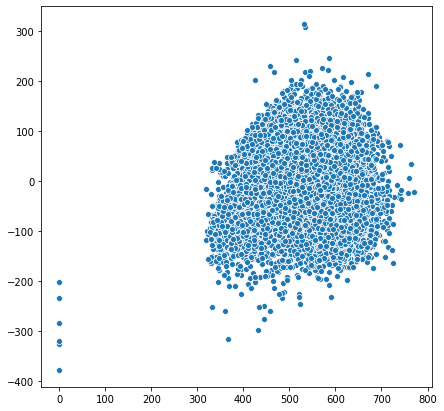

In [0]:
plt.figure(figsize=(7,7))

# Dummy
sns.scatterplot(x=y_teste.values, 
                y=y_teste - x_teste.mean(axis=1))

mais uma forma de tentar prever com médias e sem machine learning.

In [0]:
y_treino.mean()

528.67

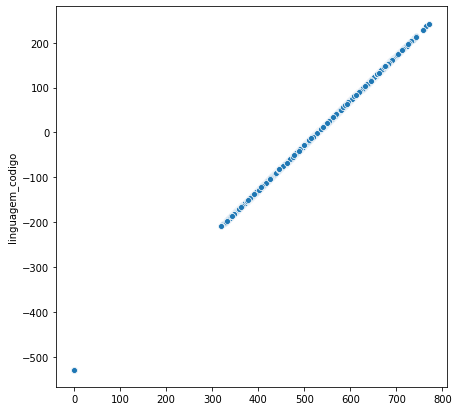

In [0]:
plt.figure(figsize=(7,7))

# Dummy
sns.scatterplot(x=y_teste.values, 
                y=y_teste - y_treino.mean())

## Modelo SVR

In [0]:
from sklearn.svm import SVR

In [0]:
modelo = SVR()
modelo.fit(x_treino, y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

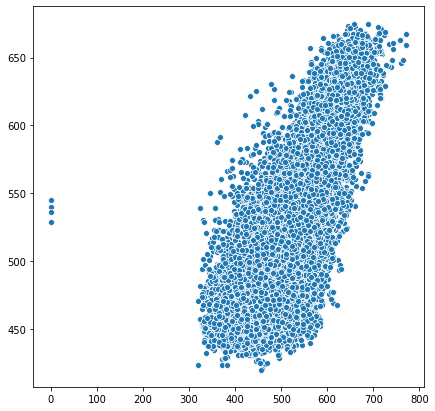

In [0]:
predicoes_notas_linguagem_codigo = modelo.predict(x_teste)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_teste.values, 
                y=predicoes_notas_linguagem_codigo)

## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

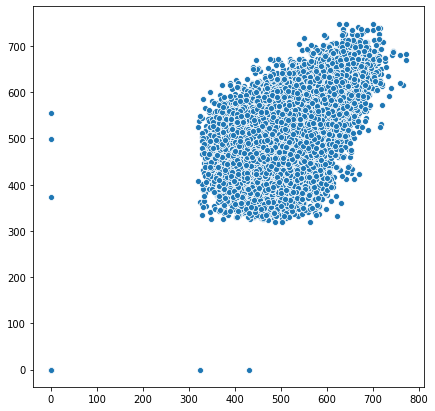

In [0]:
predicoes_notas_linguagem = modelo.predict(x_teste)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

Plotar nota real (eixo x) e nota estimada ou a nota final de verdade (eixo y).

Em laranja tem a nota real. Já em azul, a nota estimada.

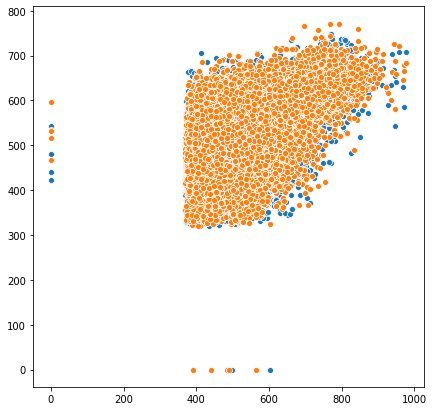

In [0]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

## Mean Squared Error

In [0]:
predicoes_notas_linguagem - y_teste

41528     102.30
81918      81.50
22786     -38.90
17935      -0.30
70617    -120.90
           ...  
54239     -51.90
98861      -3.10
105209    -30.70
110757    164.60
80515      88.00
Name: linguagem_codigo, Length: 24318, dtype: float64

In [0]:
from sklearn.metrics import mean_squared_error

esse número quanto menor melhor, pois imagine que se você acertou todas as predições, são erro será zero em todas.

In [0]:
mean_squared_error(y_teste, predicoes_notas_linguagem)

4133.52

obviamente vai dá zero porque não terá erro aqui.

In [0]:
mean_squared_error(y_teste, y_teste)

0.00

vamos comparar com o Dummy.

O Dummy por padrão utiliza a média.

In [0]:
from sklearn.dummy import DummyRegressor

In [0]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)

dummy_predicoes = modelo_dummy.predict(x_teste)

In [0]:
mean_squared_error(y_teste, dummy_predicoes)

5193.54

Dummy com mediana

In [0]:
modelo_dummy = DummyRegressor('median')
modelo_dummy.fit(x_treino, y_treino)

dummy_predicoes = modelo_dummy.predict(x_teste)

In [0]:
mean_squared_error(y_teste, dummy_predicoes)

5216.58

## Desafios

### Desafio 1: brinque com, explore o parametro C e o max_iter. Não há garantias que o resultado será melhor.

### Desafio 2: plotar no eixo x a média das 4 notas ao invés de uma só.

### Desafio 3: dados sem zeros!

### Desafio 4: interprete tudo que você e até mesmo sua conclusão (overfitting)

### Desafio 5: calcule as métricas de erro utilizadas (mean squared root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

O algoritmo é perfeito no treino, mas se ele é inútil no teste, não adianta de nada.

### Desafio 6: encontrar um que faça o menor mean squared root error.